EXACT PARAMETERS: [1.5, 2.5, 0.75]


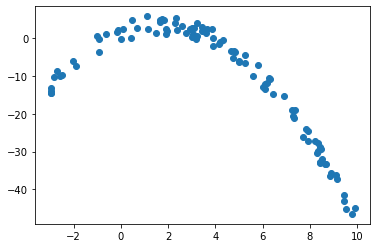

OPTIMAL PARAMETERS: [ 1.48074361  2.54174739 -0.75512604]


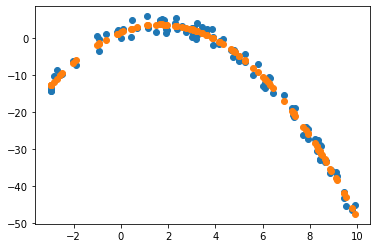

PARITY PLOT:


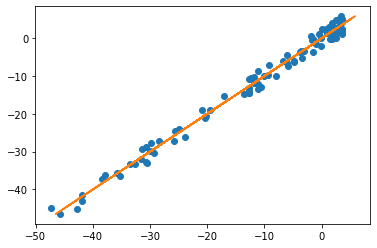

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy.optimize import minimize

#-----------------------------------
# SETUP
#-----------------------------------

# GENERATE DATA TO FIT
x=np.random.uniform(-3,10,100)
p_exact=[1.5,2.5,0.75]
y_train = (p_exact[0]+p_exact[1]*x-p_exact[2]*x**2) + 2.5*np.random.uniform(-1,1,size=len(x))
print("EXACT PARAMETERS:",p_exact)

# PLOT THE FIGURE
x_train=x
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o', label='Input Data')
plt.show()

#MODEL (3 parameter model) p=(p0,p1,p2)
def m(x,p):
    return p[0]+p[1]*x+p[2]*x*x

# LOSS FUNCTION (i.e FUNCTION TO MINIMIZE FOR BEST PARAMETERES)
def loss(p):
    y_pred=m(x_train,p); #   print(y_pred.shape,y_train.shape)
    rmse=(np.mean((y_train-y_pred)**2.0))*0.5
    #print(rmse)
    return rmse

#-----------------------------------
# TRAIN: I.E MINIMIZE THE LOSS FUNCTION 
# TO FIND OPTIMAL PARAMETERS
#-----------------------------------

# INITIAL GUESS FOR 3 PARAMETERS
p0=np.random.uniform(-1,1,size=3); #print("p0.shape=",p0.shape)

# TRAIN AND PRINT PARAMETER RESULT
res = minimize(loss, p0, method='BFGS', tol=1e-5)
popt=res.x
print("OPTIMAL PARAMETERS:",popt)

# PLOT THE FIGURE
x_train=x
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o', label='Input Data')
ax.plot(x_train, m(x_train,popt), 'o', label='Input Data')
plt.show()

# Parity plot (line y_pred=y_data represents a perfect fit)
print("PARITY PLOT:")
fig, ax = plt.subplots()
ax.plot(m(x_train,popt), y_train, 'o')
ax.plot(y_train, y_train, '-')
plt.show()